In [1]:
import urllib2
import requests
import json
#import imdb
import time
import itertools
import wget
import os
import tmdbsimple as tmdb
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [2]:
# set here the path where you want the scraped folders to be saved!
poster_folder='posters_final/'
if poster_folder.split('/')[0] in os.listdir('./'):
    print('Folder already exists')
else:
    os.mkdir('./'+poster_folder)

Folder already exists


In [3]:
# For the purpose of this example, i will be working with the 1999 Sci-Fi movie - "The Matrix"!

api_key = '1fea3cec89e5971c008e47892726db08' #Enter your own API key here to run the code below. 
# Generate your own API key as explained above :)


tmdb.API_KEY = api_key #This sets the API key setting for the tmdb object
search = tmdb.Search() #this instantiates a tmdb "search" object which allows your to search for the movie

# These functions take in a string movie name i.e. like "The Matrix" or "Interstellar"
# What they return is pretty much clear in the name - Poster, ID , Info or genre of the Movie!
def grab_poster_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    posterp=movie.info()['poster_path']
    title=movie.info()['original_title']
    url='image.tmdb.org/t/p/original'+posterp
    title='_'.join(title.split(' '))
    strcmd='wget -O '+poster_folder+title+'.jpg '+url
    os.system(strcmd)

def get_movie_id_tmdb(movie):
    response = search.movie(query=movie)
    movie_id=response['results'][0]['id']
    return movie_id

def get_movie_info_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    info=movie.info()
    return info

def get_movie_genres_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    genres=movie.info()['genres']
    return genres

In [4]:
info=get_movie_info_tmdb("The Matrix")
print "All the Movie information from TMDB gets stored in a dictionary with the following keys for easy access -"
info.keys()

All the Movie information from TMDB gets stored in a dictionary with the following keys for easy access -


[u'poster_path',
 u'production_countries',
 u'revenue',
 u'overview',
 u'video',
 u'id',
 u'genres',
 u'title',
 u'tagline',
 u'vote_count',
 u'homepage',
 u'belongs_to_collection',
 u'original_language',
 u'status',
 u'spoken_languages',
 u'imdb_id',
 u'adult',
 u'backdrop_path',
 u'production_companies',
 u'release_date',
 u'popularity',
 u'original_title',
 u'budget',
 u'vote_average',
 u'runtime']

## Getting movie information from IMDB

Now that we know how to get information from TMDB, here's how we can get information about the same movie from IMDB. This makes it possible for us to combine more information, and get a richer dataset. I urge you to try and see what dataset you can make, and go above and beyond the basic things I've done in this tutorial. Due to the differences between the two datasets, you will have to do some cleaning, however both of these datasets are extremely clean and it will be minimal.

In [5]:
# # Create the IMDB object that will be used to access the IMDb's database.
# from imdb import IMDb
# imbd_object =IMDb() # by default access the web.

# # Search for a movie (get a list of Movie objects).
# results = imbd_object.search_movie('The Matrix')

# # As this returns a list of all movies containing the word "The Matrix", we pick the first element
# movie = results[0]

# imbd_object.update(movie)

# print "All the information we can get about this movie from IMDB-"
# movie.keys()

In [6]:
# print "The genres associated with the movie are - ",movie['genres']

## A small comparison of IMDB and TMDB

Now that we have both systems running, let's do a very short comparison for the same movie?

In [7]:
# print "The genres for The Matrix pulled from IMDB are -",movie['genres']
# print "The genres for The Matrix pulled from TMDB are -",get_movie_genres_tmdb("The Matrix")

As we can see, both the systems are correct, but the way they package information is different. TMDB calls it "Science Fiction" and has an ID for every genre. While IMDB calls it "Sci-Fi". Thus, it is important to keep track of these things when making use of both the datasets simultaneously.

Now that we know how to scrape information for one movie, let's take a bigger step towards scraping multiple movies?

## Working with multiple movies : Obtaining Top 20 movies from TMDB

We first instantiate an object that inherits from class Movies from TMDB. Then We use the **popular()** class method (i.e. function) to get top movies. To get more than one page of results, the optional page argument lets us see movies from any specified page number.

In [8]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()

# This is a dictionary, and to access results we use the key 'results' which returns info on 20 movies
print(len(top_movies['results']))
top20_movs=top_movies['results']

20


So, TMDB doesn't want to make your job as easy as you thought. Why these random numbers? Want to see their genre names? Well, there's the Genre() class for it. Let's get this done!

In [9]:
# Create a tmdb genre object!
genres=tmdb.Genres()
# the list() method of the Genres() class returns a listing of all genres in the form of a dictionary.
list_of_genres=genres.movie_list()['genres']

Let's convert this list into a nice dictionary to look up genre names from genre IDs!

In [10]:
Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    Genre_ID_to_name[genre_id]=genre_name

# Section 4 - Building a dataset to work with : Let's take a look at the top 1000 movies from the database

In [11]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()

# This is a dictionary, and to access results we use the key 'results' which returns info on 20 movies
len(top_movies['results'])
top20_movs=top_movies['results']

In [12]:
# Comment out this cell once the data is saved into pickle file.
# all_movies=tmdb.Movies()
# top1000_movies=[]
# print('Pulling movie list, Please wait...')
# for i in range(1,51):
#     if i%15==0:
#         time.sleep(7)
#     movies_on_this_page=all_movies.popular(page=i)['results']
#     top1000_movies.extend(movies_on_this_page)
# len(top1000_movies)
# f3=open('movie_list.pckl','wb')
# pickle.dump(top1000_movies,f3)
# f3.close()
# print('Done!')

In [14]:
f3=open('movie_list.pckl','rb')
top1000_movies=pickle.load(f3)
f3.close()

# Pairwise analysis of Movie Genres

As our dataset is multi label, simply looking at the ditribution of genres is not sufficient. It might be beneficial to see which genres co-occur, as it might shed some light on inherent biases in our dataset. For example, it would make sense if romance and comedy occur together more often than documentary and comedy. Such inherent biases tell us that the underlying population we are sampling from itself is skewed and not balanced. We may then take steps to account for such problems. Even if we don't take such steps, it is important to be aware that we are making the assumption that an unbalanced dataset is not hurting our performance and if need be, we can come back to address this assumption. Good old scientific method, eh?

So for the top 1000 movies let's do some pairwise analysis for genre distributions. Our main purpose is to see which genres occur together in the same movie. So, we first define a function which takes a list and makes all possible pairs from it. Then, we pull the list of genres for a movie and run this function on the list of genres to get all pairs of genres which occur together

In [15]:
# This function just generates all possible pairs of movies
def list2pairs(l):
    # itertools.combinations(l,2) makes all pairs of length 2 from list l.
    pairs = list(itertools.combinations(l, 2))
    # then the one item pairs, as duplicate pairs aren't accounted for by itertools
    for i in l:
        pairs.append([i,i])
    return pairs

As mentioned, now we will pull genres for each movie, and use above function to count occurrences of when two genres occurred together

In [16]:
# get all genre lists pairs from all movies
allPairs = []
for movie in top1000_movies:
    allPairs.extend(list2pairs(movie['genre_ids']))
    
nr_ids = np.unique(allPairs)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
for p in allPairs:
    visGrid[np.argwhere(nr_ids==p[0]), np.argwhere(nr_ids==p[1])]+=1
    if p[1] != p[0]:
        visGrid[np.argwhere(nr_ids==p[1]), np.argwhere(nr_ids==p[0])]+=1

Let's take a look at the structure we just made. It is a 19X19 structure, as shown below. Also, see that we had 19 Genres. Needless to say, this structure counts the number of simultaneous occurrences of genres in same movie.

In [17]:
print visGrid.shape
print len(Genre_ID_to_name.keys())

(19, 19)
19


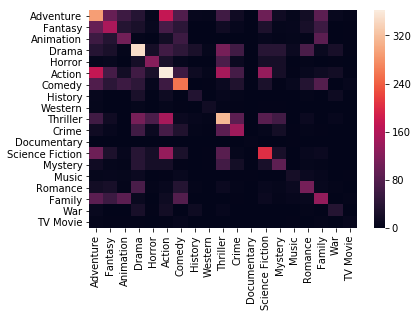

In [18]:
annot_lookup = []
for i in xrange(len(nr_ids)):
    annot_lookup.append(Genre_ID_to_name[nr_ids[i]])

sns.heatmap(visGrid, xticklabels=annot_lookup, yticklabels=annot_lookup)

The above image shows how often the genres occur together, as a heatmap

Important thing to notice in the above plot is the diagonal. The diagonal corresponds to self-pairs, i.e. number of times a genre, say Drama occurred with Drama. Which is basically just a count of the total times that genre occurred! 

As we can see there are a lot of dramas in the data set, it is also a very unspecific label. There are nearly no documentaries or TV Movies. Horror is a very distinct label, and romance is also not too widely spread. 

To account for this unbalanced data, there are multiple things we can try to explore what interesting relationships can be found.

## Delving Deeper into co-occurrence of genres

What we want to do now is to look for nice groups of genres that co-occur, and see if it makes sense to us logically? Intuitively speaking, wouldn't it be fun if we saw nice boxes on the above plot - boxes of high intensity i.e. genres that occur together and don't occur much with other genres. In some ways, that would isolate the co-occurrence of some genres, and heighten the co-occurrence of others.

While the data may not show that directly, we can play with the numbers to see if that's possible. The technique used for that is called biclustering.

In [19]:
from sklearn.cluster import SpectralCoclustering

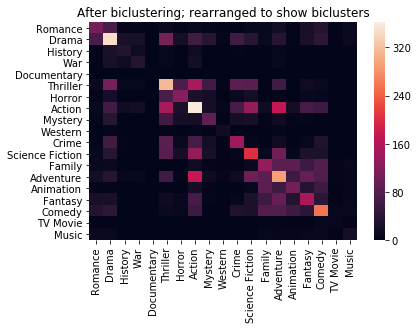

In [20]:
model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)

fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

annot_lookup_sorted = []
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(Genre_ID_to_name[nr_ids[i]])
    
sns.heatmap(fit_data, xticklabels=annot_lookup_sorted, yticklabels=annot_lookup_sorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

Looking at the above figure, "boxes" or groups of movie genres automatically emerge! 

Intuitively - Crime, Sci-Fi, Mystery, Action, Horror, Drama, Thriller, etc co-occur. 
AND, Romance, Fantasy, Family, Music, Adventure, etc co-occur. 

That makes a lot of intuitive sense, right?

One challenge is the broad range of the drama genre. It makes the two clusters highly overlapping. If we merge it together with action thriller, etc. We will end up with nearly all movies just having that label. 

**Based on playing around with the stuff above, we can sort the data into the following genre categories - "Drama, Action, ScienceFiction, exciting(thriller, crime, mystery), uplifting(adventure, fantasy, animation, comedy, romance, family), Horror, History"**


Note: that this categorization is subjective and by no means the only right solution. One could also just stay with the original labels and only exclude the ones with not enough data. Such tricks are important to balance the dataset, it allows us to increase or decrease the strength of certain signals, making it possible to improve our inferences :)

# Interesting Questions
This really should be a place for you to get creative and hopefully come up with better questions than me. 

Here are some of my thoughts:
- Which actors are bound to a genre, and which can easily hop genres?
- Is there a trend in genre popularity over the years?
- Can you use sound tracks to identify the genre of a movie?
- Are top romance actors higher paid than top action actors?
- If you look at release date vs popularity score, which movie genres have a longer shelf life?

Ideas to explore specifically for feature correlations:
- Are title length correlated with movie genre?
- Are movie posters darker for horror than for romance end comedy?
- Are some genres specifically released more often at a certain time of year? 
- Is the RPG rating correlated with the genre?

# Based on this new category set, we will now pull posters from TMDB as our training data!

In [21]:
# Done before, reading from pickle file now to maintain consistency of data!
# We now sample 100 movies per genre. Problem is that the sorting is by popular movies, so they will overlap. 
# Need to exclude movies that were already sampled. 
# movies = []
# baseyear = 2017

# print('Starting pulling movies from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...')
# done_ids=[]
# for g_id in nr_ids:
#     #print('Pulling movies for genre ID '+g_id)
#     baseyear -= 1
#     for page in xrange(1,6,1):
#         time.sleep(0.5)
    
#         url = 'https://api.themoviedb.org/3/discover/movie?api_key=' + api_key
#         url += '&language=en-US&sort_by=popularity.desc&year=' + str(baseyear) 
#         url += '&with_genres=' + str(g_id) + '&page=' + str(page)

#         data = urllib2.urlopen(url).read()

#         dataDict = json.loads(data)
#         movies.extend(dataDict["results"])
#     done_ids.append(str(g_id))
# print("Pulled movies for genres - "+','.join(done_ids))

In [22]:
# f6=open("movies_for_posters",'wb')
# pickle.dump(movies,f6)
# f6.close()

In [37]:
f6=open("movies_for_posters",'rb')
movies=pickle.load(f6)
f6.close()

Let's remove any duplicates that we have in the list of movies

In [38]:
movie_ids = [m['id'] for m in movies]
print "originally we had ",len(movie_ids)," movies"
movie_ids=np.unique(movie_ids)
print len(movie_ids)
seen_before=[]
no_duplicate_movies=[]
for i in range(len(movies)):
    movie=movies[i]
    id=movie['id']
    if id in seen_before:
        continue#         print "Seen before"
    else:
        seen_before.append(id)
        no_duplicate_movies.append(movie)
print "After removing duplicates we have ",len(no_duplicate_movies), " movies"

originally we had  1777  movies
1701
After removing duplicates we have  1701  movies


Also, let's remove movies for which we have no posters!

In [ ]:
# poster_movies=[]
# counter=0
# movies_no_poster=[]
# print("Total movies : ",len(movies))
# # print("Started downloading posters...")
# # for movie in movies:
# #     id=movie['id']
# #     title=movie['title']
# #     if counter==1:
# #         print('Downloaded first. Code is working fine. Please wait, this will take quite some time...')
# #     if counter%300==0 and counter!=0:
# #         print "Done with ",counter," movies!"
# #         print "Trying to get poster for ",title
# #     try:
# #         grab_poster_tmdb(title)
# #         poster_movies.append(movie)
# #     except:
# #         try:
# #             time.sleep(7)
# #             grab_poster_tmdb(title)
# #             poster_movies.append(movie)
# #         except:
# #             movies_no_poster.append(movie)
# #     counter+=1
# print("Done with all the posters!")

In [ ]:
# print len(movies_no_poster)
# print len(poster_movies)

In [ ]:
# f=open('poster_movies.pckl','w')
# pickle.dump(poster_movies,f)
# f.close()

In [ ]:
# f=open('poster_movies.pckl','r')
# poster_movies=pickle.load(f)
# f.close()

In [ ]:
# f=open('no_poster_movies.pckl','w')
# pickle.dump(movies_no_poster,f)
# f.close()

In [ ]:
# f=open('no_poster_movies.pckl','r')
# movies_no_poster=pickle.load(f)
# f.close()

# Congratulations, we are done scraping!

As an example, here are some possible ways to frame Y, while still sticking to the problem of genre prediction -

* Assume every movie can have multiple genres, and then it becomes a multi-label classification problem. For example, a movie can be Action, Horror and Adventure simultaneously. Thus, every movie can be more than one genre.

* Make clusters of genres as we did in Milestone 1 using biclustering, and then every movie can have only 1 genre. This way, the problem becomes a simpler, multi-class problem. For example, a movie could have the class - Uplifting (refer Milestone 1), or Horror or History. No movie get's more than one class.

For the purposes of this implementation, I'm going with the first case explained above - i.e. a multi-label classification problem.

Similarly, for designing our input features i.e. X, you may pick any features you think make sense, for example, the Director of a movie may be a good predictor for genre. OR, they may choose any features they design using algorithms like PCA. Given the richness of IMDB, TMDB and alternate sources like Wikipedia, there is a plethora of options available. **Be creative here!**

## My Implementation

Implementation decisions made - 
* The problem is framed here as a multi-label problem explained above. 
* We will try to predict multiple genres associated with a movie. This will be our Y.
* We will use 2 different kinds of X - text and images. 
* For the text part - Input features being used to predict the genre is a form of the movie's plot available from TMDB using the property 'overview'. This will be our X.
* For the image part - we will use the scraped poster images as our X. 

NOTE : We will first look at some conventional machine learning models, which were popular before the recent rise of neural networks and deep learning. For the poster image to genre prediction, I have avoided using this for the reason that conventional ML models are simply not used anymore without using deep learning for feature extraction (all discussed in detail ahead, don't be scared by the jargon). For the movie overview to genre prediction problem we will look at both conventional models and deep learning models. 

Now, let's build our X and Y!

First, let's identify movies that have overviews. **Next few steps are going to be a good example on why data cleaning is important!**

In [39]:
movies_with_overviews=[]
for i in range(len(no_duplicate_movies)):
    movie=no_duplicate_movies[i]
    id=movie['id']
    overview=movie['overview']
    
    if len(overview)==0:
        continue
    else:
        movies_with_overviews.append(movie)
        
len(movies_with_overviews)

1680

Now let's store the genre's for these movies in a list that we will later transform into a binarized vector. 

Binarized vector representation is a very common and important way data is stored/represented in ML. Essentially, it's a way to reduce a categorical variable with n possible values to n binary indicator variables. What does that mean? For example, let [(1,3),(4)] be the list saying that sample A has two labels 1 and 3, and sample B has one label 4. For every sample, for every possible label, the representation is simply 1 if it has that label, and 0 if it doesn't have that label. So the binarized version of the above list will be -
~~~~~
[(1,0,1,0]),
(0,0,0,1])]
~~~~~

In [25]:
# genres=np.zeros((len(top1000_movies),3))
genres=[]
all_ids=[]
for i in range(len(movies_with_overviews)):
    movie=movies_with_overviews[i]
    id=movie['id']
    genre_ids=movie['genre_ids']
    genres.append(genre_ids)
    all_ids.extend(genre_ids)

In [26]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genres)

In [77]:
genres[1]

[28, 12]

In [ ]:
print Y.shape
print np.sum(Y, axis=0)

In [ ]:
len(list_of_genres)

This is interesting. We started with only 19 genre labels if you remember. But the shape for Y is 1666,20 while it should be 1666,19 as there are only 19 genres? Let's explore.

Let's find genre IDs that are not present in our original list of genres!

In [67]:
# # Create a tmdb genre object!

x={
  "genres": [
    {
      "id": 28,
      "name": "Action"
    },
    {
      "id": 12,
      "name": "Adventure"
    },
    {
      "id": 16,
      "name": "Animation"
    },
    {
      "id": 35,
      "name": "Comedy"
    },
    {
      "id": 80,
      "name": "Crime"
    },
    {
      "id": 99,
      "name": "Documentary"
    },
    {
      "id": 18,
      "name": "Drama"
    },
    {
      "id": 10751,
      "name": "Family"
    },
    {
      "id": 14,
      "name": "Fantasy"
    },
    {
      "id": 36,
      "name": "History"
    },
    {
      "id": 27,
      "name": "Horror"
    },
    {
      "id": 10402,
      "name": "Music"
    },
    {
      "id": 9648,
      "name": "Mystery"
    },
    {
      "id": 10749,
      "name": "Romance"
    },
    {
      "id": 878,
      "name": "Science Fiction"
    },
    {
      "id": 10770,
      "name": "TV Movie"
    },
    {
      "id": 53,
      "name": "Thriller"
    },
    {
      "id": 10752,
      "name": "War"
    },
    {
      "id": 37,
      "name": "Western"
    }
  ]
}
Genre_ID_to_name={}
for item in x['genres']:
	Genre_ID_to_name[item['id']]=item['name']



In [68]:
for i in set(all_ids):
    if i not in Genre_ID_to_name.keys():
        print i

Well, this genre ID wasn't given to us by TMDB when we asked it for all possible genres. How do we go about this now? We can either neglect all samples that have this genre. But if you look up you'll see there's too many of these samples. So, I googled more and went into their documentation and found that this ID corresponds to the genre "Foreign". So, we add it to the dictionary of genre names ourselves. Such problems are ubiquitous in machine learning, and it is up to us to diagnose and correct them. We must always make a decision about what to keep, how to store data and so on. 

In [69]:
Genre_ID_to_name[10769]="Foreign" #Adding it to the dictionary

In [70]:
len(Genre_ID_to_name.keys())

20

Now, we turn to building the X matrix i.e. the input features! As described earlier, we will be using the overview of movies as our input vector! Let's look at a movie's overview for example!

# Congratulations, we have our data set ready!

A note : As we are building our own dataset, and I didn't want you to spend all your time waiting for poster image downloads to finish, I am working with an EXTREMELY small dataset. That is why, the results we will see for the deep learning portion will not be spectacular as compared to conventional machine learning methods. If you want to see the real power, you should spend some more time scraping something of the order of 100,000 images, as opposed to 1000 odd like I am doing here. Quoting the paper I mentioned above -  MORE DATA BEATS A CLEVERER ALGORITHM.

#### As the TA, I saw that most teams working on the project had data of the order of 100,000 movies. So, if you want to extract the power of these models, consider scraping a larger dataset than me.

# Section 5 - Non-deep, Conventional ML models with above data

Here is a layout of what we will be doing - 

- We will implement two different models
- We will decide a performance metric i.e. a quantitative method to be sure about how well difference models are doing. 
- Discussion of the differences between the models, their strengths, weaknesses, etc. 

As discussed earlier, there are a LOT of implementation decisions to be made. Between feature engineering, hyper-parameter tuning, model selection and how interpretable do you want your model to be (Read : Bayesian vs Non-Bayesian approaches) a lot is to be decided. For example, some of these models could be: 

- Generalized Linear Models
- SVM
- Shallow (1 Layer, i.e. not deep) Neural Network
- Random Forest
- Boosting
- Decision Tree

Or go more bayesian:
- Naive Bayes
- Linear or Quadratic Discriminant Analysis
- Bayesian Hierarchical models

The list is endless, and not all models will make sense for the kind of problem you have framed for yourself. ** Think about which model best fits for your purpose.**

For our purposes here, I will be showing the example of 2 very simple models, one picked from each category above - 

1. SVM
2. Multinomial Naive Bayes

A quick overview of the whole pipeline coming below: 
    
- A little bit of feature engineering
- 2 different Models 
- Evaluation Metrics chosen
- Model comparisons

### Let's start with some feature engineering. 

Engineering the right features depends on 2 key ideas. Firstly, what is it that you are trying to solve? For example, if you want to guess my music preferences and you try to train a super awesome model while giving it what my height is as input features, you're going to have no luck. On the other hand, giving it my Spotify playlist will solve the problem with any model. So, CONTEXT of the problem plays a role. 

Second, you can only represent based on the data at hand. Meaning, if you didn't have access to my Spotify playlist, but to my Facebook statuses - You know all my statuses about Harvard may not be useful. But if you represent me as my Facebook statuses which are YouTube links, that would also solve the problem. So, AVAILABILITY OF DATA at hand is the second factor. 

#### A nice way to think of it is to think that you start with the problem at hand, but design features constrained by the data you have available. If you have many independent features that each correlate well with the class, learning is easy. On the other hand, if the class is a very complex function of the features, you may not be able to learn it.


In the context of this problem, we would like to predict the genre of a movie. what we have access to - movie overviews, which are text descriptions of the movie plot. The hypothesis makes sense, overview is a short description of the story and the story is clearly important in assigning genres to movies. 

So, let's improve our features by playing with the words in the overviews in our data. One interesting way to go back to what we discussed earlier - TF-IDF. We originally used it to filter words, but we can also assign the tf-idf values as "importance" values to words, as opposed to treating them all equally. Tf-idf simply tries to identify the assign a weightage to each word in the bag of words. 

Once again, the way it works is - Most movie descriptions have the word "The" in it. Obviously, it doesn't tell you anything special about it. So weightage should be inversely proportional to how many movies have the word in their description. This is the IDF part.

On the other hand, for the movie interstellar, if the description has the word Space 5 times, and wormhole 2 times, then it's probably more about Space than about wormhole. Thus, space should have a high weightage. This is the TF part. 

We simply use TF-IDf to assign weightage to every word in the bag of words. Which makes sense, right? :)

# Section 8 - Deep Learning to get Textual Features

We will use an off the shelf representation for words - Word2Vec model. Just like VGGnet before, this is a model made available to get a meaningful representation. As the total number of words is small, we don't even need to forward propagate our sample through a network. Even that has been done for us, and the result is stored in the form of a dictionary. We can simply look up the word in the dictionary and get the Word2Vec features for the word.

In [33]:
from gensim import models
#model2 = models.Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 
model2 = models.KeyedVectors.load_word2vec_format('/home/yash/GoogleNews-vectors-negative300.bin', binary=True)

In [74]:
def precision_recall(gt,preds):
    TP=0
    FP=0
    FN=0
    for t in gt:
        if t in preds:
            TP+=1
        else:
            FN+=1
    for p in preds:
        if p not in gt:
            FP+=1
    if TP+FP==0:
        precision=0
    else:
        precision=TP/float(TP+FP)
    if TP+FN==0:
        recall=0
    else:
        recall=TP/float(TP+FN)
    return precision,recall

For the same set of movies above, let's try and predict the genres from the deep representation of their overviews!

In [41]:
final_movies_set=movies_with_overviews

In [42]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

In [43]:
movie_mean_wordvec=np.zeros((len(final_movies_set),300))
movie_mean_wordvec.shape

(1680, 300)

Text needs some pre-processing before we can train the model. The only preprocessing we do here is - we delete commonly occurring words which we know are not informative about the genre. Think of it as the clutter in some sense. These words are often removed and are referred to as "stop words". You can look them up online. These include simple words like "a", "and", "but", "how", "or" and so on. They can be easily removed using the python package NLTK.

From the above dataset, movies with overviews which contain only stop words, or movies with overviews containing no words with word2vec representation are neglected. Others are used to build our Mean word2vec representation. Simply, put for every movie overview - 

* Take movie overview
* Throw out stop words
* For non stop words:
    - If in word2vec - take it's word2vec representation which is 300 dimensional
    - If not - throw word
* For each movie, calculate the arithmetic mean of the 300 dimensional vector representations for all words in the overview which weren't thrown out

This mean becomes the 300 dimensional representation for the movie. For all movies, these are stored in a numpy array. So the X matrix becomes (1263,300). And, Y is (1263,20) i.e. binarized 20 genres, as before

**Why do we take the arithmetic mean?**
If you feel that we should have kept all the words separately - Then you're thinking correct, but sadly we're limited by the way current day neural networks work. I will not mull over this for the fear of stressing too much on an otherwise irrelevant detail. But if you're interested, read this awesome paper - 
https://jiajunwu.com/papers/dmil_cvpr.pdf

In [44]:
genres=[]
rows_to_delete=[]
for i in range(len(final_movies_set)):
    mov=final_movies_set[i]
    movie_genres=mov['genre_ids']
    genres.append(movie_genres)
    overview=mov['overview']
    tokens = tokenizer.tokenize(overview)
    stopped_tokens = [k for k in tokens if not k in en_stop]
    count_in_vocab=0
    s=0
    if len(stopped_tokens)==0:
        rows_to_delete.append(i)
        genres.pop(-1)
        #print overview
        #print "sample ",i,"had no nonstops"
    else:
        for tok in stopped_tokens:
            if tok.lower() in model2.vocab:
                count_in_vocab+=1
                s+=model2[tok.lower()]
        if count_in_vocab!=0:
            movie_mean_wordvec[i]=s/float(count_in_vocab)
        else:
            rows_to_delete.append(i)
            genres.pop(-1)
#             print overview
#             print "sample ",i,"had no word2vec"

In [45]:
len(genres)

1680

In [46]:
mask2=[]
for row in range(len(movie_mean_wordvec)):
    if row in rows_to_delete:
        mask2.append(False)
    else:
        mask2.append(True)

In [47]:
X=movie_mean_wordvec[mask2]

In [48]:
X.shape

(1680, 300)

In [49]:
Y=mlb.fit_transform(genres)

In [50]:
Y.shape

(1680, 20)

In [51]:
# textual_features=(X,Y)
# f9=open('textual_features.pckl','wb')
# pickle.dump(textual_features,f9)
# f9.close()

In [52]:
# textual_features=(X,Y)
f9=open('textual_features.pckl','rb')
textual_features=pickle.load(f9)
f9.close()

In [53]:
(X,Y)=textual_features

In [54]:
X.shape

(1680, 300)

In [55]:
Y.shape

(1680, 20)

In [56]:
mask_text=np.random.rand(len(X))<0.8

In [57]:
X_train=X[mask_text]
Y_train=Y[mask_text]
X_test=X[~mask_text]
Y_test=Y[~mask_text]

Once again, we use a very similar, super simple architecture as before.

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_textual = Sequential([
    Dense(300, input_shape=(300,)),
    Activation('relu'),
    Dense(20),
    Activation('softmax'),
])

model_textual.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [60]:
model_textual.fit(X_train, Y_train, epochs=100000, batch_size=512)#,verbose=0 if no printing

In [61]:
score = model_textual.evaluate(X_test, Y_test, batch_size=256)

333/333 [==============================] - 0s 55us/step


In [62]:
print("%s: %.2f%%" % (model_textual.metrics_names[1], score[1]*100))

acc: 86.19%


In [63]:
Y_preds=model_textual.predict(X_test)

In [71]:
genre_list=sorted(list(Genre_ID_to_name.keys()))

In [72]:
genre_list.append(10769)

In [75]:
print "Our predictions for the movies are - \n"
precs=[]
recs=[]
for i in range(len(Y_preds)):
    row=Y_preds[i]
    gt_genres=Y_test[i]
    gt_genre_names=[]
    for j in range(20):
        if gt_genres[j]==1:
            gt_genre_names.append(Genre_ID_to_name[genre_list[j]])
    top_3=np.argsort(row)[-3:]
    predicted_genres=[]
    for genre in top_3:
        predicted_genres.append(Genre_ID_to_name[genre_list[genre]])
    (precision,recall)=precision_recall(gt_genre_names,predicted_genres)
    precs.append(precision)
    recs.append(recall)
    if i%50==0:
        print "Predicted: ",predicted_genres," Actual: ",gt_genre_names

Our predictions for the movies are - 

Predicted:  ['Family', 'Adventure', 'Fantasy']  Actual:  ['Adventure', 'Fantasy', 'Family']
Predicted:  ['Family', 'Adventure', 'Animation']  Actual:  ['Fantasy', 'Animation', 'Drama', 'Comedy']
Predicted:  ['Science Fiction', 'Horror', 'Thriller']  Actual:  ['Horror', 'Thriller', 'Science Fiction']
Predicted:  ['Drama', 'War', 'History']  Actual:  ['Drama', 'History', 'War']
Predicted:  ['Adventure', 'Animation', 'Family']  Actual:  ['Drama', 'Documentary']
Predicted:  ['Science Fiction', 'Horror', 'Thriller']  Actual:  ['Adventure', 'Horror', 'Thriller', 'Mystery']
Predicted:  ['Fantasy', 'TV Movie', 'Family']  Actual:  ['Adventure', 'Fantasy', 'Comedy', 'Family']


In [76]:
print np.mean(np.asarray(precs)),np.mean(np.asarray(recs))

0.5285285285285285 0.5605605605605606
